In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chisquare
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

In [3]:
df = pd.read_csv("Healthcare_sheet2.csv")

Data description

In [4]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


In [5]:
#number of rows, columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [6]:
#descriptive metrics for countable variables
df.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [7]:
df.shape

(3424, 69)

In [8]:
df.isnull().sum()

Ptid                                                                  0
Persistency_Flag                                                      0
Gender                                                                0
Race                                                                  0
Ethnicity                                                             0
Region                                                                0
Age_Bucket                                                            0
Ntm_Speciality                                                        0
Ntm_Specialist_Flag                                                   0
Ntm_Speciality_Bucket                                                 0
Gluco_Record_Prior_Ntm                                                0
Gluco_Record_During_Rx                                                0
Dexa_Freq_During_Rx                                                   0
Dexa_During_Rx                                                  

In [9]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [Ptid, Persistency_Flag, Gender, Race, Ethnicity, Region, Age_Bucket, Ntm_Speciality, Ntm_Specialist_Flag, Ntm_Speciality_Bucket, Gluco_Record_Prior_Ntm, Gluco_Record_During_Rx, Dexa_Freq_During_Rx, Dexa_During_Rx, Frag_Frac_Prior_Ntm, Frag_Frac_During_Rx, Risk_Segment_Prior_Ntm, Tscore_Bucket_Prior_Ntm, Risk_Segment_During_Rx, Tscore_Bucket_During_Rx, Change_T_Score, Change_Risk_Segment, Adherent_Flag, Idn_Indicator, Injectable_Experience_During_Rx, Comorb_Encounter_For_Screening_For_Malignant_Neoplasms, Comorb_Encounter_For_Immunization, Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx, Comorb_Vitamin_D_Deficiency, Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified, Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx, Comorb_Long_Term_Current_Drug_Therapy, Comorb_Dorsalgia, Comorb_Personal_History_Of_Other_Diseases_And_Conditions, Comorb_Other_Disorders_Of_Bone_Density_And_Structure, Comorb_Disorders_of_lipoprotein_metabolism_a

There are no null/NaN values or duplicates in the dataset.

Let's see how many unique values there are in each column - this is useful to know how many classes the categorical variables contain.

In [10]:
for col in df.columns:
    print(col, '--', df[col].nunique())

Ptid -- 3424
Persistency_Flag -- 2
Gender -- 2
Race -- 4
Ethnicity -- 3
Region -- 5
Age_Bucket -- 4
Ntm_Speciality -- 36
Ntm_Specialist_Flag -- 2
Ntm_Speciality_Bucket -- 3
Gluco_Record_Prior_Ntm -- 2
Gluco_Record_During_Rx -- 2
Dexa_Freq_During_Rx -- 58
Dexa_During_Rx -- 2
Frag_Frac_Prior_Ntm -- 2
Frag_Frac_During_Rx -- 2
Risk_Segment_Prior_Ntm -- 2
Tscore_Bucket_Prior_Ntm -- 2
Risk_Segment_During_Rx -- 3
Tscore_Bucket_During_Rx -- 3
Change_T_Score -- 4
Change_Risk_Segment -- 4
Adherent_Flag -- 2
Idn_Indicator -- 2
Injectable_Experience_During_Rx -- 2
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms -- 2
Comorb_Encounter_For_Immunization -- 2
Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx -- 2
Comorb_Vitamin_D_Deficiency -- 2
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified -- 2
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx -- 2
Comorb_Long_Term_Current_Drug_Therapy -- 2
Comorb_Dorsalgia -- 2
Comorb_Personal_History_Of_Other_Diseases_And

And now the names of each unique value, again useful especially for categorical data.

In [11]:
for col in df:
    print(col, '--', df[col].unique())

Ptid -- ['P1' 'P2' 'P3' ... 'P3422' 'P3423' 'P3424']
Persistency_Flag -- ['Persistent' 'Non-Persistent']
Gender -- ['Male' 'Female']
Race -- ['Caucasian' 'Asian' 'Other/Unknown' 'African American']
Ethnicity -- ['Not Hispanic' 'Hispanic' 'Unknown']
Region -- ['West' 'Midwest' 'South' 'Other/Unknown' 'Northeast']
Age_Bucket -- ['>75' '55-65' '65-75' '<55']
Ntm_Speciality -- ['GENERAL PRACTITIONER' 'Unknown' 'ENDOCRINOLOGY' 'RHEUMATOLOGY'
 'ONCOLOGY' 'PATHOLOGY' 'OBSTETRICS AND GYNECOLOGY'
 'PSYCHIATRY AND NEUROLOGY' 'ORTHOPEDIC SURGERY'
 'PHYSICAL MEDICINE AND REHABILITATION' 'SURGERY AND SURGICAL SPECIALTIES'
 'PEDIATRICS' 'PULMONARY MEDICINE' 'HEMATOLOGY & ONCOLOGY' 'UROLOGY'
 'PAIN MEDICINE' 'NEUROLOGY' 'RADIOLOGY' 'GASTROENTEROLOGY'
 'EMERGENCY MEDICINE' 'PODIATRY' 'OPHTHALMOLOGY' 'OCCUPATIONAL MEDICINE'
 'TRANSPLANT SURGERY' 'PLASTIC SURGERY' 'CLINICAL NURSE SPECIALIST'
 'OTOLARYNGOLOGY' 'HOSPITAL MEDICINE' 'ORTHOPEDICS' 'NEPHROLOGY'
 'GERIATRIC MEDICINE' 'HOSPICE AND PALLIATIVE ME

Value counts for ordinal and categorical variables with multiple levels are useful to show skewness and imbalances in the data.

In [12]:
for col in df:
    if col != 'Ptid':
        print(col, end="\n")
        print(df[col].value_counts(), end='\n\n')

Persistency_Flag
Non-Persistent    2135
Persistent        1289
Name: Persistency_Flag, dtype: int64

Gender
Female    3230
Male       194
Name: Gender, dtype: int64

Race
Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: Race, dtype: int64

Ethnicity
Not Hispanic    3235
Hispanic          98
Unknown           91
Name: Ethnicity, dtype: int64

Region
Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: Region, dtype: int64

Age_Bucket
>75      1439
65-75    1086
55-65     733
<55       166
Name: Age_Bucket, dtype: int64

Ntm_Speciality
GENERAL PRACTITIONER                                              1535
RHEUMATOLOGY                                                       604
ENDOCRINOLOGY                                                      458
Unknown                                                            310
ONCOLOGY                                                

A lot of variables are imbalanced, with some showing as little as one data point for a single level of a category: for example, Ntm_Specialty shows that only one participant was prescribed the treatment by a doctor specialising in nuclear medicine - therefore, the nuclear medicine category doesn't contain enough data to explain results. Such data will need to be dropped/replaced. 

Let's look at skewness for ordinal variables Dexa_Freq_During_Rx (number of Dexa scans taken during treatment) and Count_Of_Risks (total number of health risks of each participant). We will do this by looking at skewness values, histograms and outliers using boxplots.

In [13]:
print(df['Dexa_Freq_During_Rx'].skew())

6.8087302112992285


Dexa_Freq_During_Rx shows increased positive skewness - outliers may need to be replaced (removing them might drastically change the dataset).

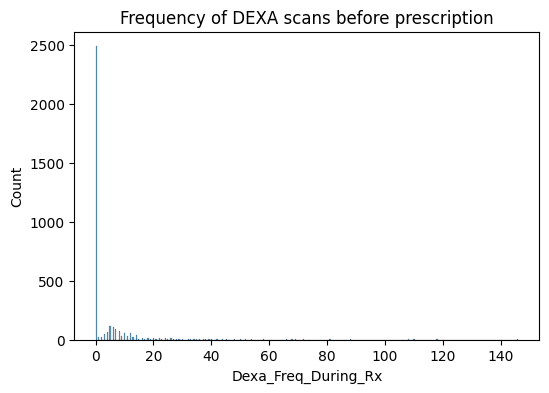

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(6, 4))
sns.histplot(x = 'Dexa_Freq_During_Rx', data = df)
plt.title('Frequency of DEXA scans before prescription')
plt.show()

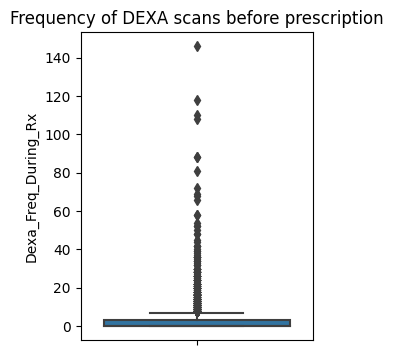

In [15]:
f, ax = plt.subplots(figsize=(3, 4))
sns.boxplot(y=df['Dexa_Freq_During_Rx'])
plt.title('Frequency of DEXA scans before prescription')
plt.show()

In [16]:
df['Count_Of_Risks'].value_counts()

1    1242
0     970
2     781
3     317
4      91
5      15
6       6
7       2
Name: Count_Of_Risks, dtype: int64

In [17]:
print(df['Count_Of_Risks'].skew())

0.8797905232898707


Count_Of_Risks shows a little positive skewness, only some outliers can be replaced with less extreme values.

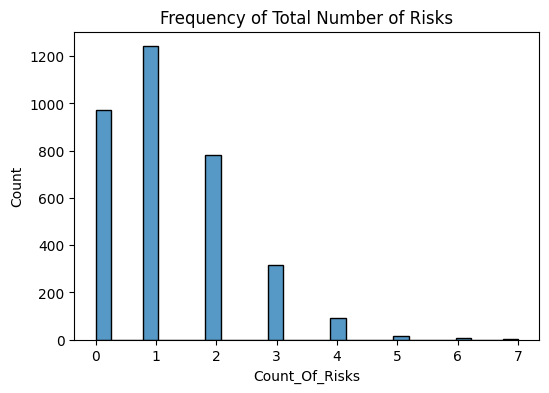

In [18]:
f, ax = plt.subplots(figsize=(6, 4))
sns.histplot(x = 'Count_Of_Risks', data = df)
plt.title('Frequency of Total Number of Risks')
plt.show()

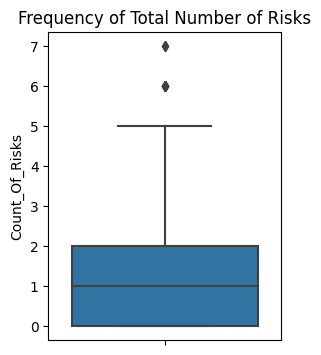

In [19]:
f, ax = plt.subplots(figsize=(3, 4))
sns.boxplot(y=df['Count_Of_Risks'])
plt.title('Frequency of Total Number of Risks')
plt.show()

Let's replace outliers in the DEXA scans category which is heavily skewed - will use the flooring and capping method, replacing extreme outliers outside the 25% and 75% quantiles with the edge values of these quantiles.


In [20]:
Q1_dexa = df['Dexa_Freq_During_Rx'].quantile(0.25)
Q3_dexa = df['Dexa_Freq_During_Rx'].quantile(0.75)
IQR_dexa = Q3_dexa - Q1_dexa
lower_whisker_dexa = Q1_dexa - IQR_dexa
upper_whisker_dexa = Q3_dexa + IQR_dexa
df['Dexa_Freq_During_Rx']=np.where(df['Dexa_Freq_During_Rx']>upper_whisker_dexa,upper_whisker_dexa,
                                   np.where(df['Dexa_Freq_During_Rx']<lower_whisker_dexa,
                                            lower_whisker_dexa,df['Dexa_Freq_During_Rx']))

In [21]:
print(df['Dexa_Freq_During_Rx'].skew())

1.1652161574692141


Skewness value for Dexa_Freq_During_Rx has improved dramatically - still positively skewed but less so.

For Count_Of_Risks we will use a similar method, but this time only cap at a higher edge - less outliers need to be removed due to less skeweness. Let's find an appropriate quantile value.

In [22]:
df['Count_Of_Risks'].quantile(0.75)

2.0

In [23]:
df['Count_Of_Risks'].quantile(0.90)

3.0

In [24]:
df['Count_Of_Risks'].quantile(0.95)

3.0

In [25]:
df['Count_Of_Risks'].quantile(0.99)

4.0

In [26]:
df['Count_Of_Risks'] = np.where(df['Count_Of_Risks'] > 4, 4, df['Count_Of_Risks'])


All cells with more than 4 associated risks have been replaced with this number.

In [27]:
print(df['Count_Of_Risks'].skew())

0.6626495371035904


And this shows an improvement in skewness!

We will also need to drop some variables which show less than a particular value for specific levels of a category. The way we chose this was to look at a critical category with one level showing way less data points than the other levels, but enough to not need replacing/dropping. We thought the best such variable was Change_Risk_Segment, or the change in risk segment per participant over the course of the treatment. Only 22 participants showed improvement, and this is the lowest number in any of the levels of this category. Even though these data are highly imbalanced (1052 participants did not show a change in the risk segment), we feel that the data from the 22 participants who improved are sufficient - at most, they could be adjusted through oversampling.

Consequently, we will remove all other binary variables with less than 22 data points contained in a particular level. These are as below:

In [28]:
#create separate dataset for ordinal conversion and remove unneeded columns
df_ordinal = df.drop(columns = ['Ptid', 'Ntm_Speciality', 'Risk_Untreated_Chronic_Hyperthyroidism', 
                                'Risk_Osteogenesis_Imperfecta', 'Risk_Untreated_Early_Menopause', 
                                'Risk_Chronic_Liver_Disease','Risk_Estrogen_Deficiency', 
                                'Risk_Immobilization'])

In [29]:
le = LabelEncoder()

In [30]:
for col in df_ordinal:
    if col != 'Dexa_Freq_During_Rx' or col != 'Count_Of_Risks':
        df_ordinal[col] = le.fit_transform(df_ordinal[col])

In [31]:
df_ordinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 61 columns):
 #   Column                                                              Non-Null Count  Dtype
---  ------                                                              --------------  -----
 0   Persistency_Flag                                                    3424 non-null   int64
 1   Gender                                                              3424 non-null   int64
 2   Race                                                                3424 non-null   int64
 3   Ethnicity                                                           3424 non-null   int64
 4   Region                                                              3424 non-null   int64
 5   Age_Bucket                                                          3424 non-null   int64
 6   Ntm_Specialist_Flag                                                 3424 non-null   int64
 7   Ntm_Speciality_Bucket            

Next, we will want to see correlations between different variables. For visualisation purposes, we will group some of the variables that are more likely to be correlated into their respective categories, such as demographics, provider attributes, clinical factors, comorbidities, concommitant conditions and risks.

In [32]:
demographics = df_ordinal.iloc[:,:6]
demographics


,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket
0,1,1,2,1,4,3
1,0,1,1,1,4,0
2,0,0,3,0,0,1
3,0,0,2,1,0,3
4,0,0,2,1,0,3
...,...,...,...,...,...,...
3419,1,0,2,1,3,3
3420,1,0,2,1,3,3
3421,1,0,2,1,3,3
3422,0,0,2,1,3,0


In [33]:
provider_attributes = df_ordinal.iloc[:,[6, 7, 21]]
provider_attributes

,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Idn_Indicator
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
3419,0,1,1
3420,0,1,1
3421,1,0,1
3422,0,1,1


In [34]:
clinical_factors = df_ordinal.iloc[:, 8:23]
clinical_factors = clinical_factors.drop(columns = 'Idn_Indicator')
clinical_factors

,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Injectable_Experience_During_Rx
0,0,0,0,0,0,0,1,1,2,0,1,2,0,1
1,0,0,0,0,0,0,1,1,1,2,2,2,0,1
2,0,0,0,0,0,0,0,0,0,0,1,1,0,1
3,0,1,0,0,0,0,0,1,0,0,1,1,0,1
4,1,1,0,0,0,0,0,0,1,2,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,0,0,0,0,0,0,1,1,1,2,2,2,0,1
3420,0,0,0,0,0,0,0,0,1,2,2,2,1,1
3421,0,0,6,1,0,0,1,1,0,0,1,3,0,1
3422,0,0,0,0,0,1,1,1,1,2,2,2,0,1


In [35]:
comorbidity_details = df_ordinal.iloc[:, 23:37]
comorbidity_details

,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease
0,0,1,1,0,0,1,0,1,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,1,0,0,1,0,0,1,0,0,1
4,1,1,1,0,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,1,0,1,1,0,0,0,1,0,1,1,0,0,1
3420,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3421,1,0,0,1,1,0,0,0,0,0,1,0,0,0
3422,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [36]:
concomitancy_details = df_ordinal.iloc[:, 37:47]
concomitancy_details

,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,1
4,0,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3419,1,1,1,1,1,0,0,0,0,0
3420,0,0,0,1,0,1,0,0,0,0
3421,1,1,0,0,0,0,0,0,1,0
3422,0,1,0,1,0,0,0,0,0,0


In [37]:
risk_factors = df_ordinal.iloc[:, 47:61]
risk_factors

,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hypogonadism,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Recurring_Falls,Count_Of_Risks
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,1,0,0,0,0,0,2
3,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3420,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3421,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3422,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Let's calculate persistence rates (% of persistent participants) for the different levels of potentially significant variables, such as demographics, improvement in risk or health scores, etc. We shall also conduct significance testing between the levels of each variable - this is to potentially remove variables which do not show significance. Because the dataset contains so many variables, we will not show graphs for each one. 

In [38]:
grouped_data = df_ordinal.groupby('Gender')['Persistency_Flag'].mean()
grouped_data.index

Int64Index([0, 1], dtype='int64', name='Gender')

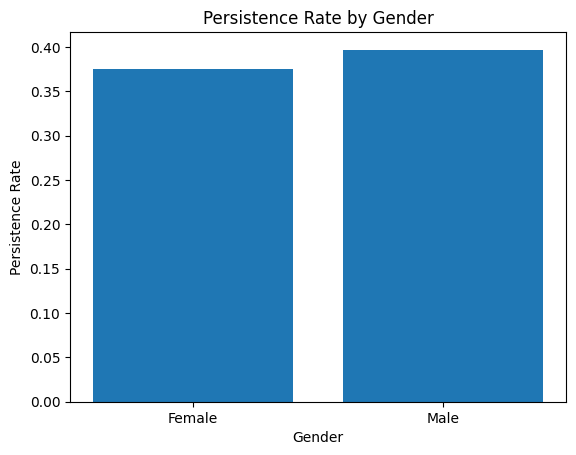

In [39]:
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Gender')
plt.ylabel('Persistence Rate')
plt.xticks(grouped_data.index, ['Female', 'Male'])
plt.title('Persistence Rate by Gender')
plt.show()

In [40]:
chisquare(grouped_data)

Power_divergenceResult(statistic=0.0006084476607102172, pvalue=0.9803207911308529)

In [41]:
grouped_data = df_ordinal.groupby('Race')['Persistency_Flag'].mean()
grouped_data.index

Int64Index([0, 1, 2, 3], dtype='int64', name='Race')

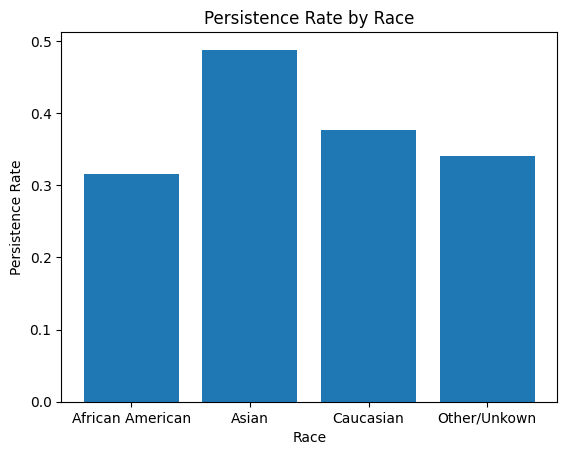

In [42]:
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Race')
plt.ylabel('Persistence Rate')
plt.xticks(grouped_data.index, ['African American', 'Asian', 'Caucasian', 'Other/Unkown'])
plt.title('Persistence Rate by Race')
plt.show()

In [43]:
chisquare(grouped_data)

Power_divergenceResult(statistic=0.04578380151469388, pvalue=0.9974300226575612)

In [44]:
grouped_data = df_ordinal.groupby('Region')['Persistency_Flag'].mean()
grouped_data.index

Int64Index([0, 1, 2, 3, 4], dtype='int64', name='Region')

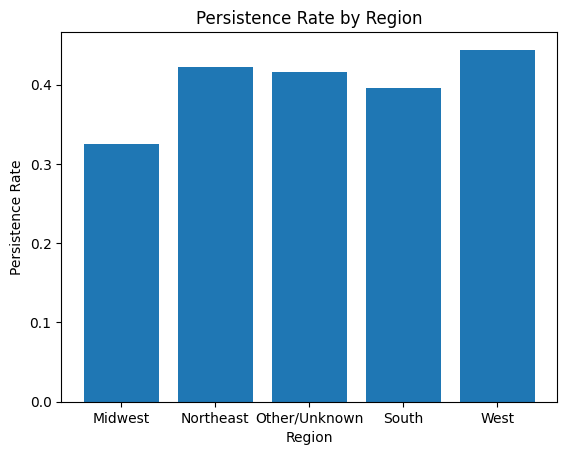

In [45]:
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Region')
plt.ylabel('Persistence Rate')
plt.xticks(grouped_data.index, ['Midwest', 'Northeast', 'Other/Unknown', 'South', 'West'])
plt.title('Persistence Rate by Region')
plt.show()

In [46]:
chisquare(grouped_data)

Power_divergenceResult(statistic=0.021016582554621265, pvalue=0.9999451731771251)

In [47]:
grouped_data = df_ordinal.groupby('Age_Bucket')['Persistency_Flag'].mean()
grouped_data.index

Int64Index([0, 1, 2, 3], dtype='int64', name='Age_Bucket')

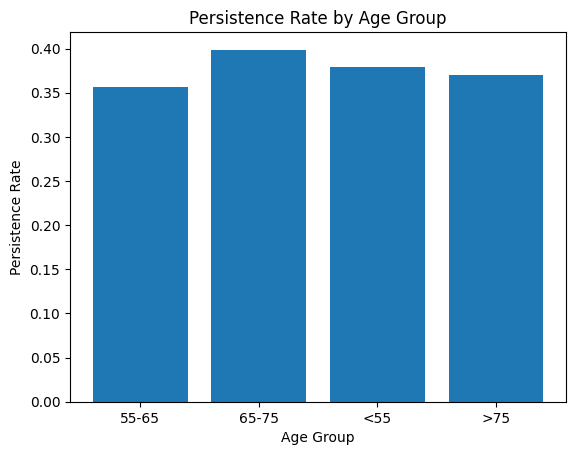

In [48]:
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Age Group')
plt.ylabel('Persistence Rate')
plt.xticks(grouped_data.index, ['55-65', '65-75', '<55', '>75'])
plt.title('Persistence Rate by Age Group')
plt.show()

In [49]:
chisquare(grouped_data)

Power_divergenceResult(statistic=0.002566494844899103, pvalue=0.9999654462615714)

In [50]:
grouped_data = df_ordinal.groupby('Ntm_Specialist_Flag')['Persistency_Flag'].mean()
grouped_data.index

Int64Index([0, 1], dtype='int64', name='Ntm_Specialist_Flag')

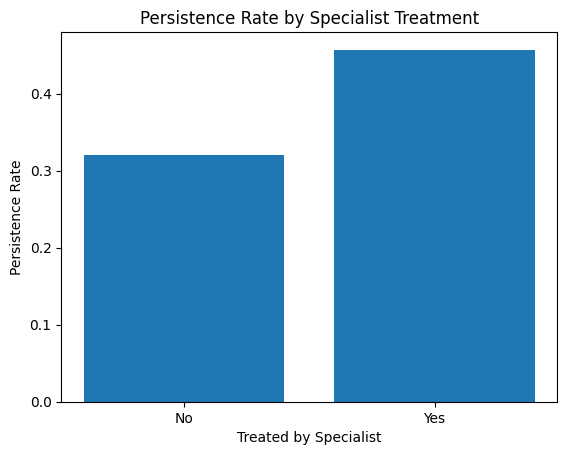

In [51]:
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Treated by Specialist')
plt.ylabel('Persistence Rate')
plt.xticks(grouped_data.index, ['No' , 'Yes'])
plt.title('Persistence Rate by Specialist Treatment')
plt.show()

In [52]:
chisquare(grouped_data)

Power_divergenceResult(statistic=0.024225700345256066, pvalue=0.8763120056982856)

In [53]:
grouped_data = df_ordinal.groupby('Gluco_Record_Prior_Ntm')['Persistency_Flag'].mean()
grouped_data.index


Int64Index([0, 1], dtype='int64', name='Gluco_Record_Prior_Ntm')

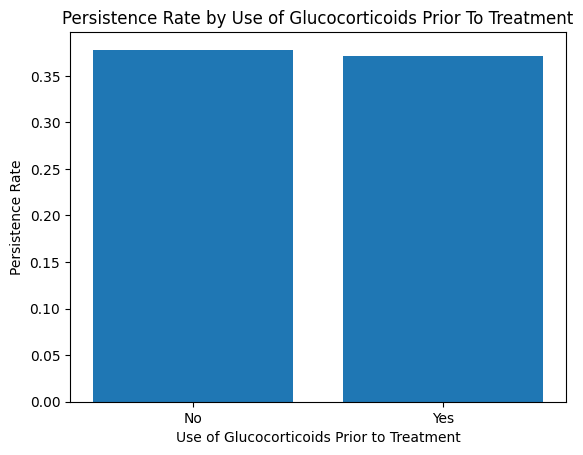

In [54]:
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Use of Glucocorticoids Prior to Treatment')
plt.ylabel('Persistence Rate')
plt.xticks(grouped_data.index, ['No', 'Yes'])
plt.title('Persistence Rate by Use of Glucocorticoids Prior To Treatment')
plt.show()

In [55]:
chisquare(grouped_data)

Power_divergenceResult(statistic=5.7742197744709486e-05, pvalue=0.993937070240985)

In [56]:
grouped_data = df_ordinal.groupby('Gluco_Record_During_Rx')['Persistency_Flag'].mean()
grouped_data.index


Int64Index([0, 1], dtype='int64', name='Gluco_Record_During_Rx')

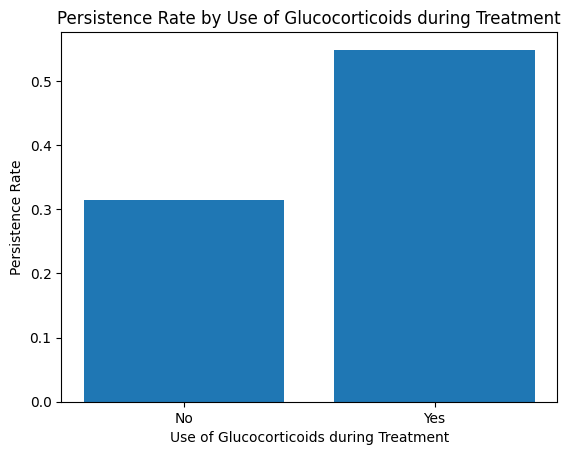

In [57]:
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Use of Glucocorticoids during Treatment')
plt.ylabel('Persistence Rate')
plt.xticks(grouped_data.index, ['No', 'Yes'])
plt.title('Persistence Rate by Use of Glucocorticoids during Treatment')
plt.show()

In [58]:
chisquare(grouped_data)

Power_divergenceResult(statistic=0.06337706286067948, pvalue=0.8012358416150446)

In [59]:
grouped_data = df_ordinal.groupby('Risk_Segment_Prior_Ntm')['Persistency_Flag'].mean()
grouped_data.index


Int64Index([0, 1], dtype='int64', name='Risk_Segment_Prior_Ntm')

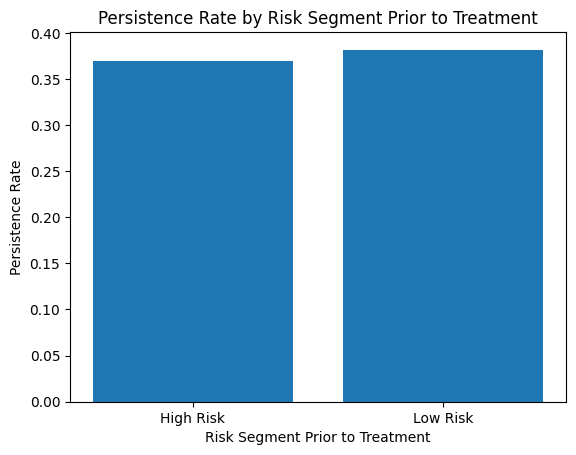

In [60]:
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Risk Segment Prior to Treatment')
plt.ylabel('Persistence Rate')
plt.xticks(grouped_data.index, ['High Risk', 'Low Risk'])
plt.title('Persistence Rate by Risk Segment Prior to Treatment')
plt.show()

In [61]:
chisquare(grouped_data)

Power_divergenceResult(statistic=0.000189800590254928, pvalue=0.9890080409245847)

In [62]:
grouped_data = df_ordinal.groupby('Risk_Segment_During_Rx')['Persistency_Flag'].mean()
grouped_data.index

Int64Index([0, 1, 2], dtype='int64', name='Risk_Segment_During_Rx')

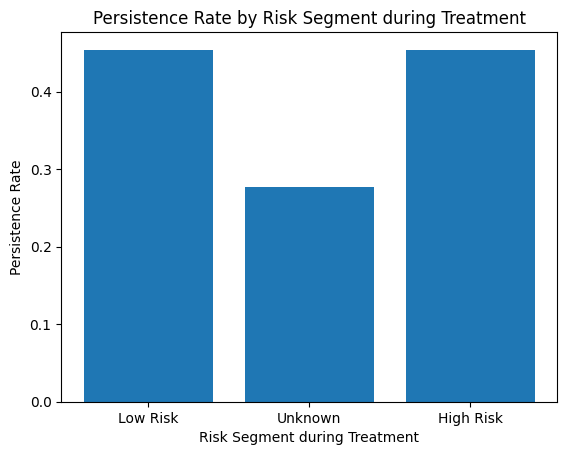

In [63]:
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Risk Segment during Treatment')
plt.ylabel('Persistence Rate')
plt.xticks(grouped_data.index, ['Low Risk', 'Unknown', 'High Risk'])
plt.title('Persistence Rate by Risk Segment during Treatment')
plt.show()

In [64]:
chisquare(grouped_data)

Power_divergenceResult(statistic=0.05250852666079812, pvalue=0.974087383416576)

In [65]:
grouped_data = df_ordinal.groupby('Change_Risk_Segment')['Persistency_Flag'].mean()
grouped_data.index

Int64Index([0, 1, 2, 3], dtype='int64', name='Change_Risk_Segment')

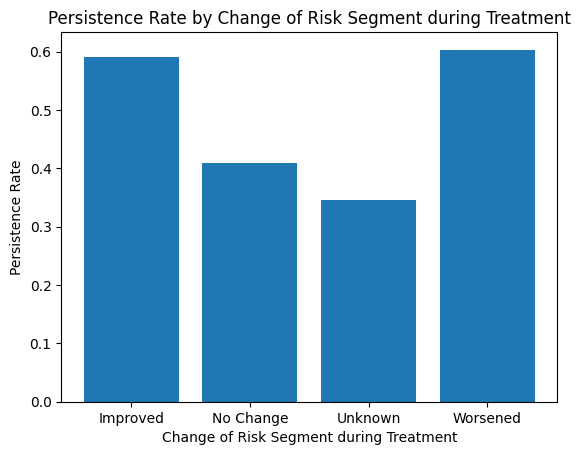

In [66]:
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Change of Risk Segment during Treatment')
plt.ylabel('Persistence Rate')
plt.xticks(grouped_data.index, ['Improved', 'No Change', 'Unknown', 'Worsened'])
plt.title('Persistence Rate by Change of Risk Segment during Treatment')
plt.show()

In [67]:
chisquare(grouped_data)

Power_divergenceResult(statistic=0.10272097961399373, pvalue=0.9915089083827511)

In [68]:
grouped_data = df_ordinal.groupby('Tscore_Bucket_Prior_Ntm')['Persistency_Flag'].mean()
grouped_data.index

Int64Index([0, 1], dtype='int64', name='Tscore_Bucket_Prior_Ntm')

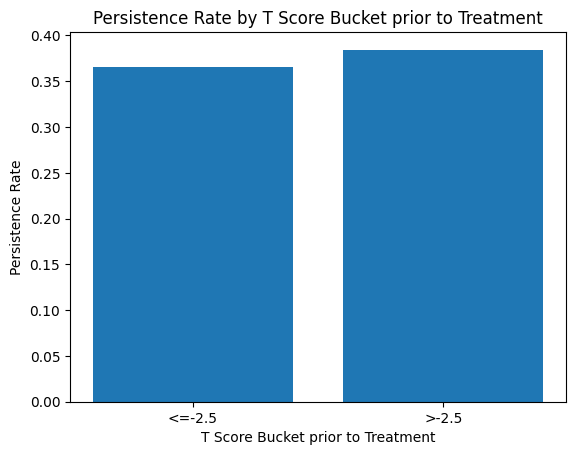

In [69]:
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('T Score Bucket prior to Treatment')
plt.ylabel('Persistence Rate')
plt.xticks(grouped_data.index, ['<=-2.5' , '>-2.5'])
plt.title('Persistence Rate by T Score Bucket prior to Treatment')
plt.show()

In [70]:
chisquare(grouped_data)

Power_divergenceResult(statistic=0.00045604660770883344, pvalue=0.9829622725143766)

In [71]:
grouped_data = df_ordinal.groupby('Tscore_Bucket_During_Rx')['Persistency_Flag'].mean()
grouped_data.index

Int64Index([0, 1, 2], dtype='int64', name='Tscore_Bucket_During_Rx')

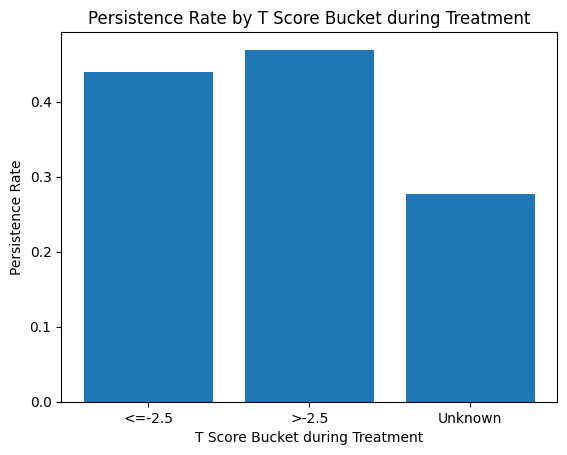

In [72]:
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('T Score Bucket during Treatment')
plt.ylabel('Persistence Rate')
plt.xticks(grouped_data.index, ['<=-2.5' , '>-2.5', 'Unknown'])
plt.title('Persistence Rate by T Score Bucket during Treatment')
plt.show()

In [73]:
chisquare(grouped_data)

Power_divergenceResult(statistic=0.054042650500116196, pvalue=0.9733404845737887)

In [74]:
grouped_data = df_ordinal.groupby('Change_T_Score')['Persistency_Flag'].mean()
grouped_data.index

Int64Index([0, 1, 2, 3], dtype='int64', name='Change_T_Score')

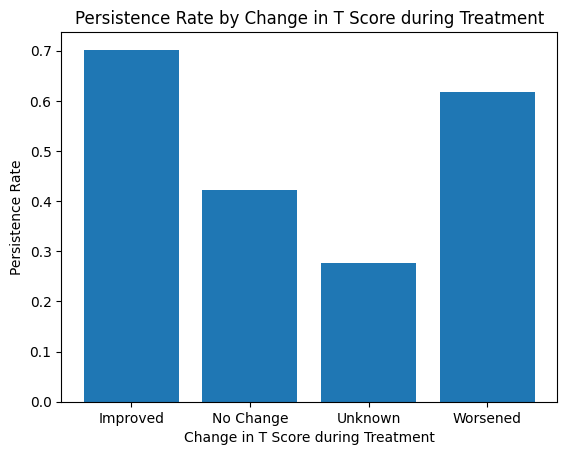

In [75]:
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Change in T Score during Treatment')
plt.ylabel('Persistence Rate')
plt.xticks(grouped_data.index, ['Improved', 'No Change', 'Unknown', 'Worsened'])
plt.title('Persistence Rate by Change in T Score during Treatment')
plt.show()

In [76]:
chisquare(grouped_data)

Power_divergenceResult(statistic=0.21872836912388355, pvalue=0.9745107310004432)

In [77]:
grouped_data = df_ordinal.groupby('Adherent_Flag')['Persistency_Flag'].mean()
grouped_data.index

Int64Index([0, 1], dtype='int64', name='Adherent_Flag')

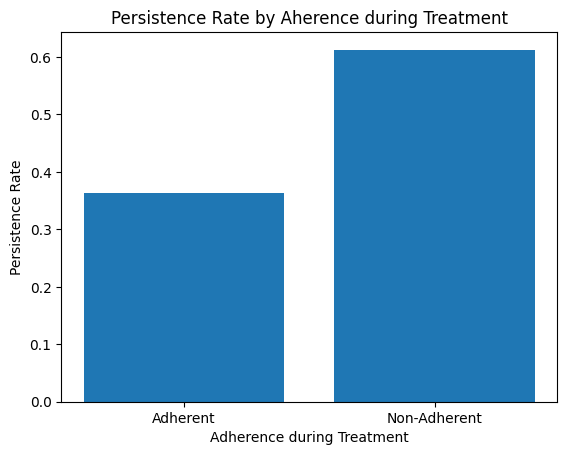

In [78]:
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Adherence during Treatment')
plt.ylabel('Persistence Rate')
plt.xticks(grouped_data.index, ['Adherent' , 'Non-Adherent'])
plt.title('Persistence Rate by Aherence during Treatment')
plt.show()

In [79]:
chisquare(grouped_data)

Power_divergenceResult(statistic=0.0633989678480597, pvalue=0.8012022148596367)

In [80]:
grouped_data = df_ordinal.groupby('Count_Of_Risks')['Persistency_Flag'].mean()
grouped_data.index

Int64Index([0, 1, 2, 3, 4], dtype='int64', name='Count_Of_Risks')

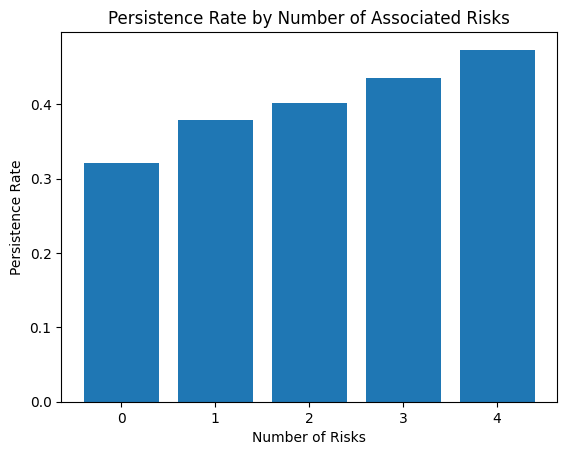

In [81]:
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Number of Risks')
plt.ylabel('Persistence Rate')
plt.xticks(grouped_data.index, ['0', '1', '2', '3', '4'])
plt.title('Persistence Rate by Number of Associated Risks')
plt.show()

In [82]:
chisquare(grouped_data)

Power_divergenceResult(statistic=0.03286294418046108, pvalue=0.9998664730858726)

There are no significant differences between the persistence rates of any of the plotted variables. For example, males and females show similar persistence rates, but the data set contains a lot more information from females than males; another example would be that persistence rates increases with the number of associated risks - however, fewer people are at risk for multiple conditions rather than for less conditions or none. Therefore we will consider all remaining variables for our model and use dimensionality reduction techniques to remove features. 

One such dimensionality reduction technique is principal component analysis (PCA) which creates new orthogonal variables based on the data to remove multicollineariy (variables correlated with one another). So let's first see if multicollinearity exists in our data. 

In [83]:
corr = clinical_factors.corr()

<AxesSubplot:>

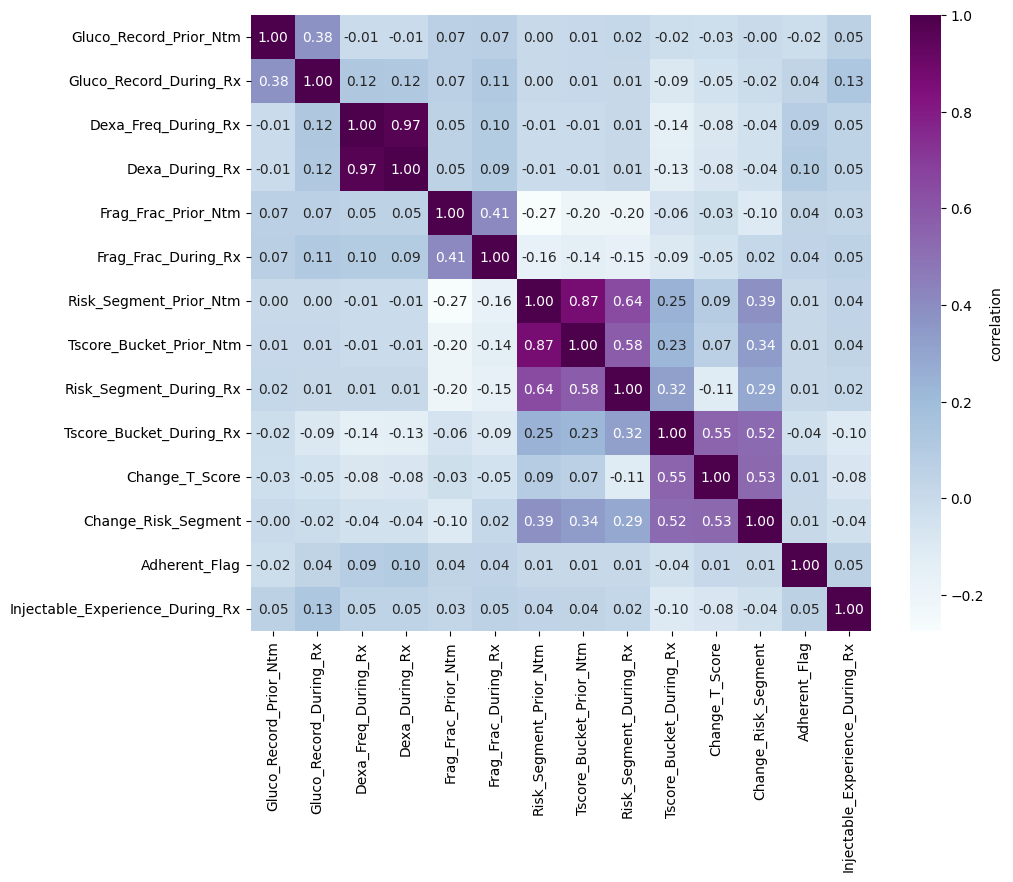

In [84]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="BuPu", cbar_kws={'label': 'correlation'}, fmt='.2f')

In [85]:
corr = comorbidity_details.corr()

<AxesSubplot:>

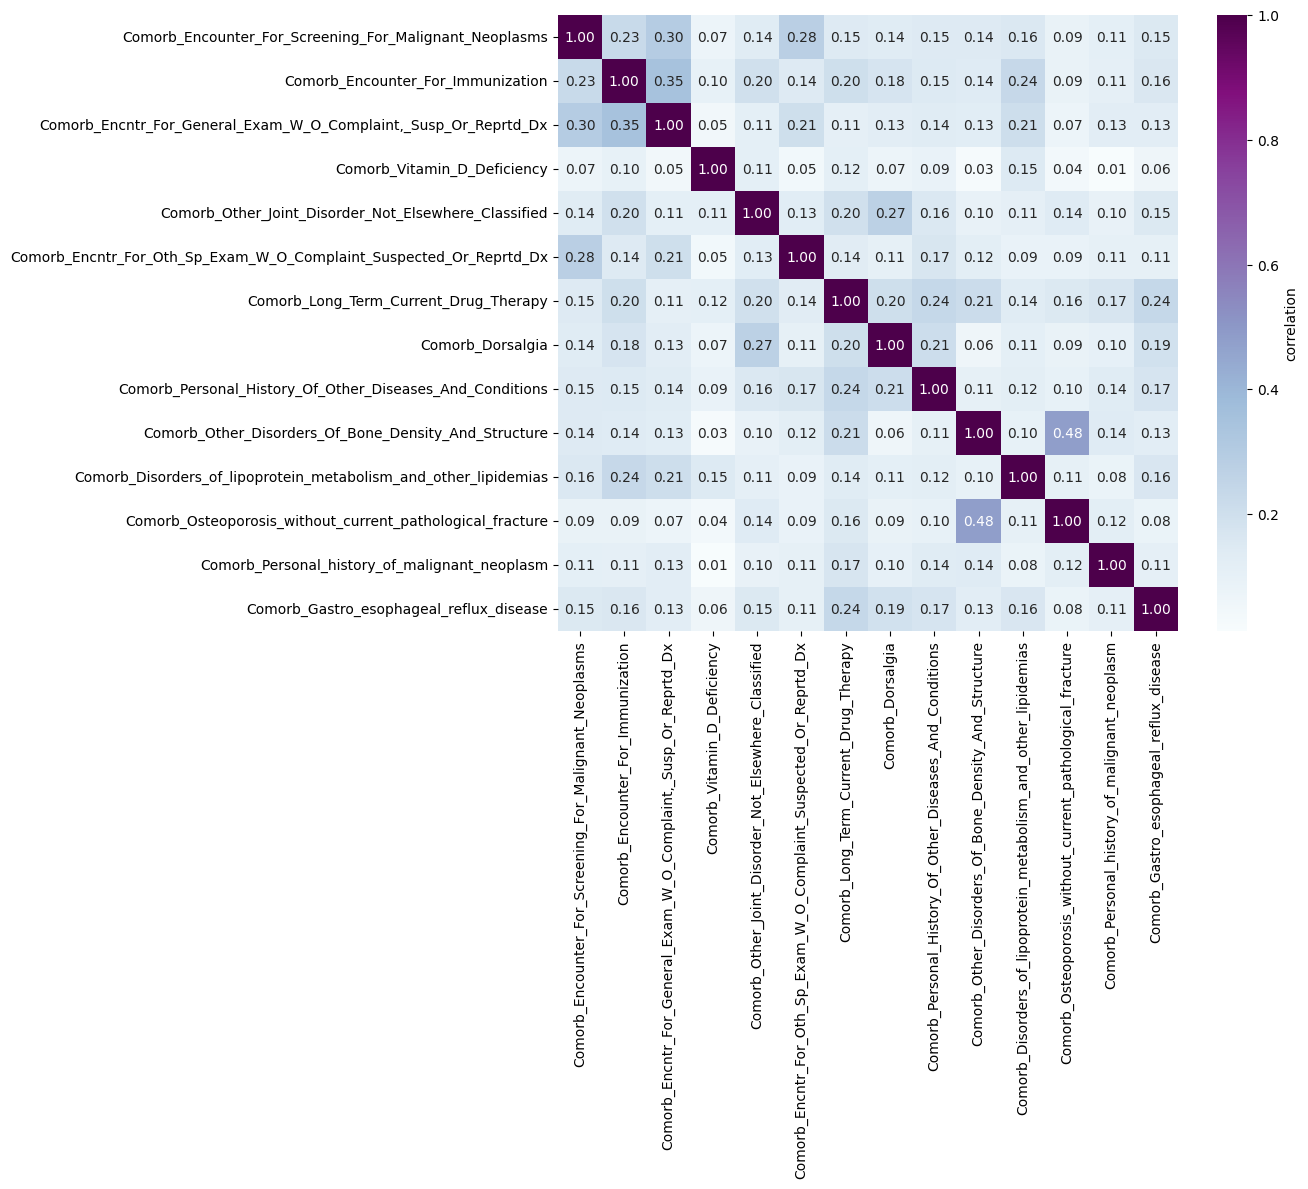

In [86]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="BuPu", cbar_kws={'label': 'correlation'}, fmt='.2f')

In [87]:
corr = concomitancy_details.corr()

<AxesSubplot:>

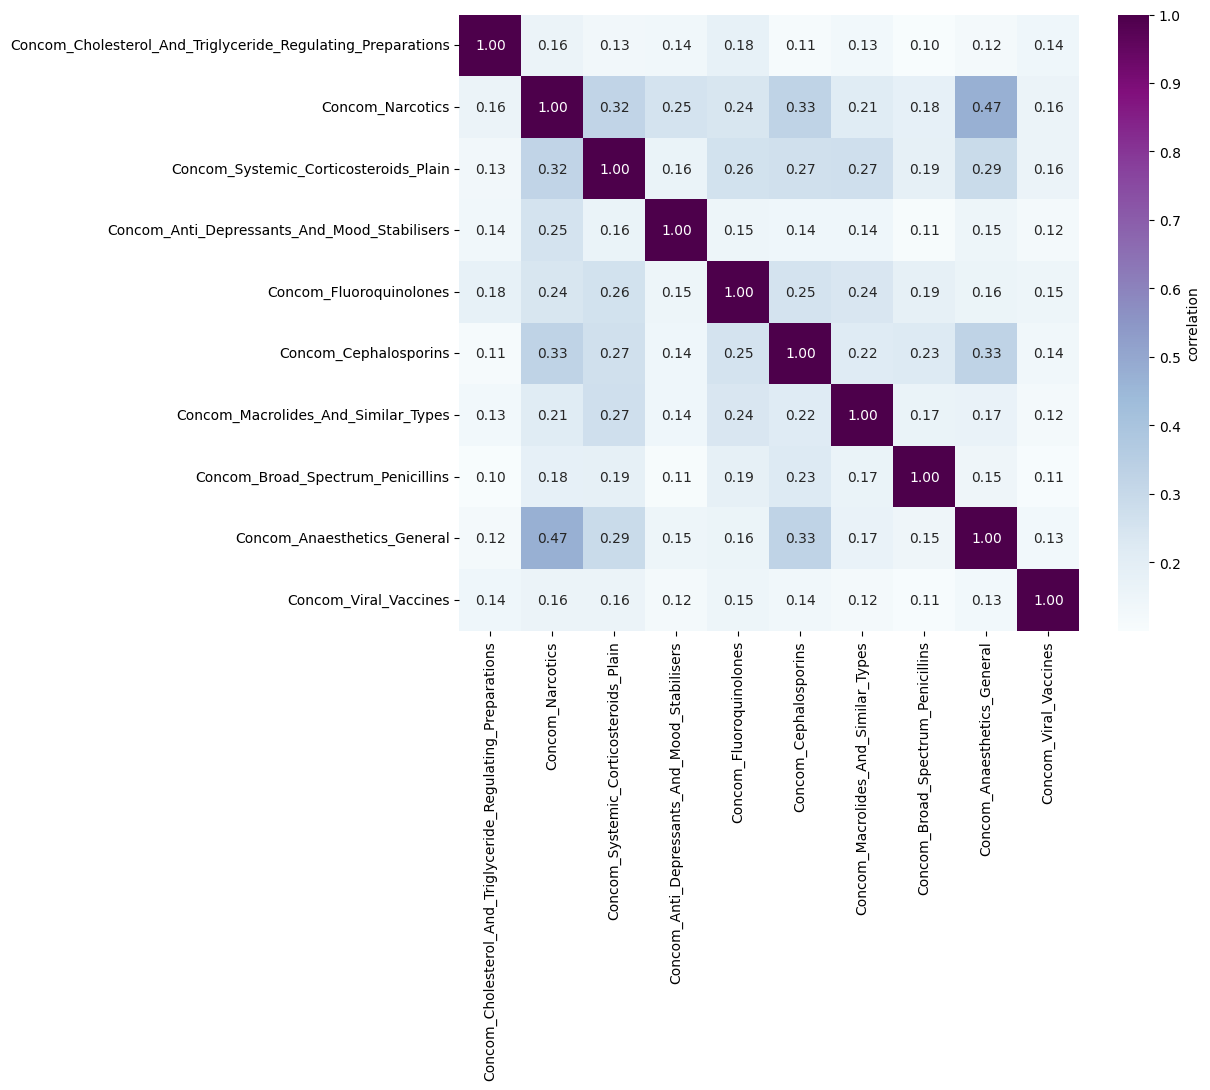

In [88]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="BuPu", cbar_kws={'label': 'correlation'}, fmt='.2f')

In [89]:
corr = risk_factors.corr()

<AxesSubplot:>

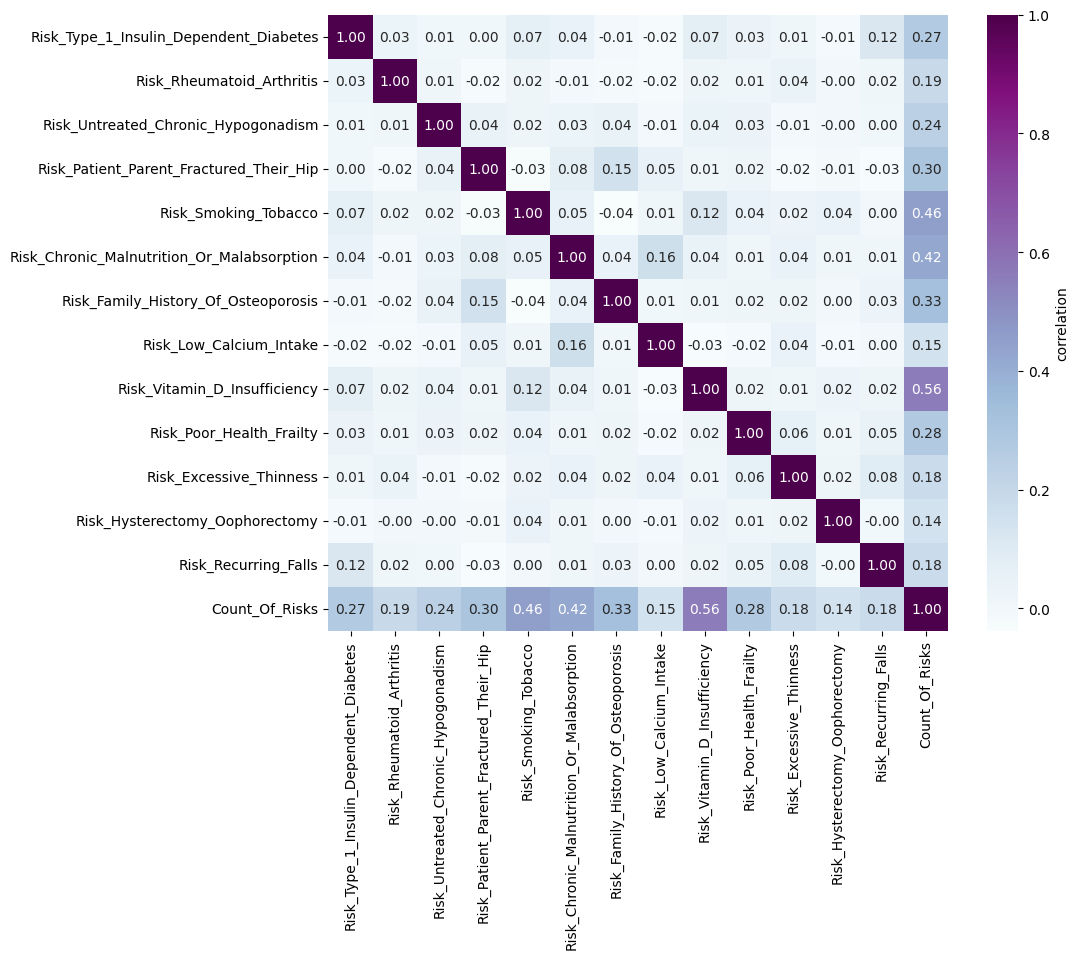

In [90]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="BuPu", cbar_kws={'label': 'correlation'}, fmt='.2f')

The most important correlations are in the clinical factors group of data, between risk score and T segment prior to treatment (this is to be expected because both features are indicators of overall health), and between Dexa_During_Rx (whether participants had Dexa scans during treatment) and Dexa_Freq_During_Rx (how frequent these scans were). These correlations were expected and are not many. Some medium-sized correlations are shown between a number of the other variables, so PCA may be useful in improving the model's efficiency. Dimensionality reduction will be an important part of the modelling process, but first, let's choose the model for these data. 

Because of the binary outcome of the data we will be looking at logistic regression - even though there may be a non-linear combination between the different factors impacting the outcome (and therefore other, more sophisticated models may be useful), we will focus more on best practices for dimensionality reduction. 

First, let's run the model on the existing data with only a few columns removed. 

In [91]:
X = df_ordinal.drop(columns=['Persistency_Flag'])
Y = df_ordinal['Persistency_Flag']

In [92]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [93]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [94]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [95]:
y_pred = model.predict(x_test)

In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       636
           1       0.78      0.69      0.73       392

    accuracy                           0.81      1028
   macro avg       0.80      0.79      0.79      1028
weighted avg       0.81      0.81      0.80      1028



In [97]:
print("Accuracy: ", round(model.score(x_test, y_test),2))

Accuracy:  0.81


In [98]:
coefficients = model.coef_[0]

<AxesSubplot:ylabel='Feature'>

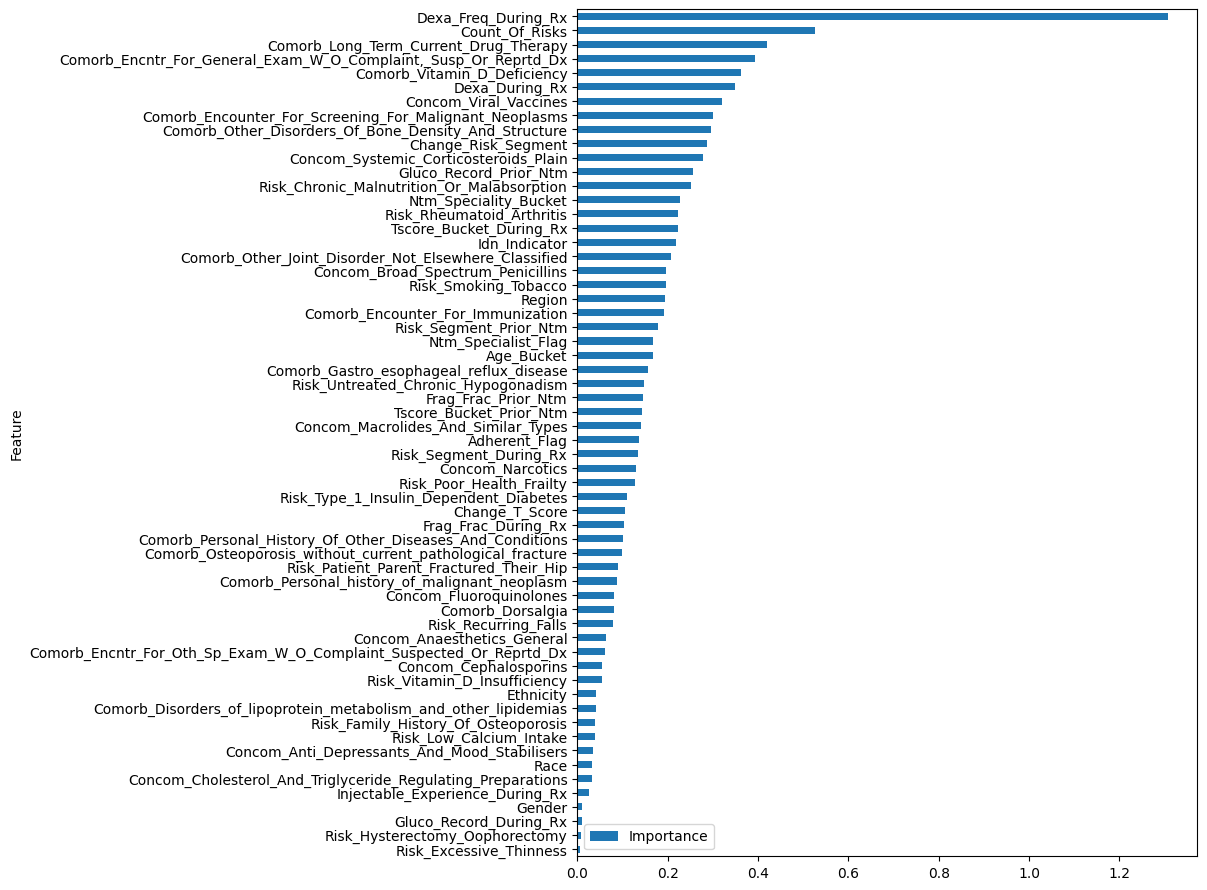

In [99]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(8, 11))

In [100]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit(maxiter = 100)
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.395857
         Iterations 7
                                                  Results: Logit
Model:                                Logit                            Pseudo R-squared:                 0.402    
Dependent Variable:                   Persistency_Flag                 AIC:                              2830.8298
Date:                                 2023-06-11 20:20                 BIC:                              3199.1437
No. Observations:                     3424                             Log-Likelihood:                   -1355.4  
Df Model:                             59                               LL-Null:                          -2267.7  
Df Residuals:                         3364                             LLR p-value:                      0.0000   
Converged:                            1.0000                           Scale:                            1.0000   
No. Iterations:             

In [101]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred, pos_label=1)

In [102]:
roc_auc1 = roc_auc_score(y_test, y_pred)
roc_auc1

0.785128674111154

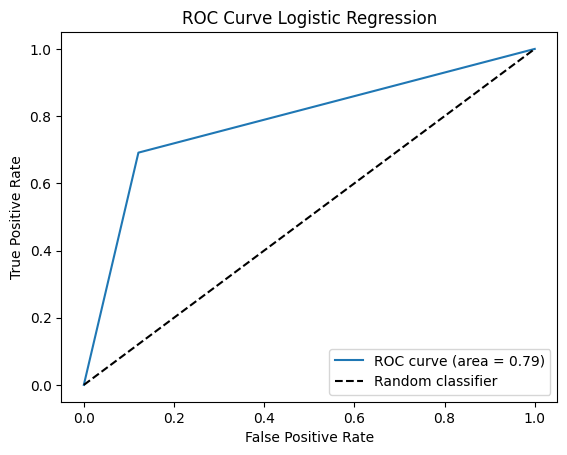

In [103]:
plt.plot(fpr1, tpr1, label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Logistic Regression')
plt.legend(loc="lower right")
plt.show()

The model performs at 82% accuracy (ROC curve 0.79), but many variables going into the model still show p-values above the significance level. Let's try to improve the model using PCA.

In [104]:
pca = PCA()
X_new = pca.fit_transform(X)

In [105]:
pca.get_covariance()

array([[ 5.34642646e-02,  8.84785713e-04,  1.57657381e-03, ...,
        -8.93829810e-04,  1.19501530e-03,  4.11762377e-04],
       [ 8.84785713e-04,  1.61218281e-01, -2.73498612e-03, ...,
        -6.09196720e-05, -4.18673432e-04,  7.83850178e-04],
       [ 1.57657381e-03, -2.73498612e-03,  5.52105432e-02, ...,
        -2.59889805e-04,  3.33351763e-04, -1.44291741e-02],
       ...,
       [-8.93829810e-04, -6.09196720e-05, -2.59889805e-04, ...,
         1.55268374e-02, -2.57671442e-05,  1.91610286e-02],
       [ 1.19501530e-03, -4.18673432e-04,  3.33351763e-04, ...,
        -2.57671442e-05,  1.97515399e-02,  2.66259068e-02],
       [ 4.11762377e-04,  7.83850178e-04, -1.44291741e-02, ...,
         1.91610286e-02,  2.66259068e-02,  1.12886635e+00]])

In [106]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([3.08109744e-01, 1.24792336e-01, 7.62075715e-02, 7.01081364e-02,
       5.08378262e-02, 3.50831544e-02, 2.89841155e-02, 1.99429997e-02,
       1.75737202e-02, 1.40662770e-02, 1.37344100e-02, 1.25972944e-02,
       1.19096051e-02, 1.16499358e-02, 1.01178603e-02, 9.45825513e-03,
       9.02600202e-03, 8.48160562e-03, 7.95535869e-03, 7.90186054e-03,
       7.53994869e-03, 7.24264548e-03, 7.09485200e-03, 6.78096045e-03,
       6.53247557e-03, 6.42689082e-03, 6.30618102e-03, 6.19284307e-03,
       6.02173739e-03, 5.71784403e-03, 5.61437778e-03, 5.48599321e-03,
       5.20508250e-03, 5.11838530e-03, 5.03918555e-03, 4.87644978e-03,
       4.70022940e-03, 4.43808928e-03, 3.76012126e-03, 3.56482771e-03,
       3.46642722e-03, 3.37314979e-03, 3.23222034e-03, 2.95085016e-03,
       2.91820593e-03, 2.70184002e-03, 2.53887665e-03, 2.39414735e-03,
       2.14510083e-03, 1.96987644e-03, 1.73011943e-03, 1.64327927e-03,
       1.49916829e-03, 1.39560026e-03, 1.03681681e-03, 8.13932201e-04,
      

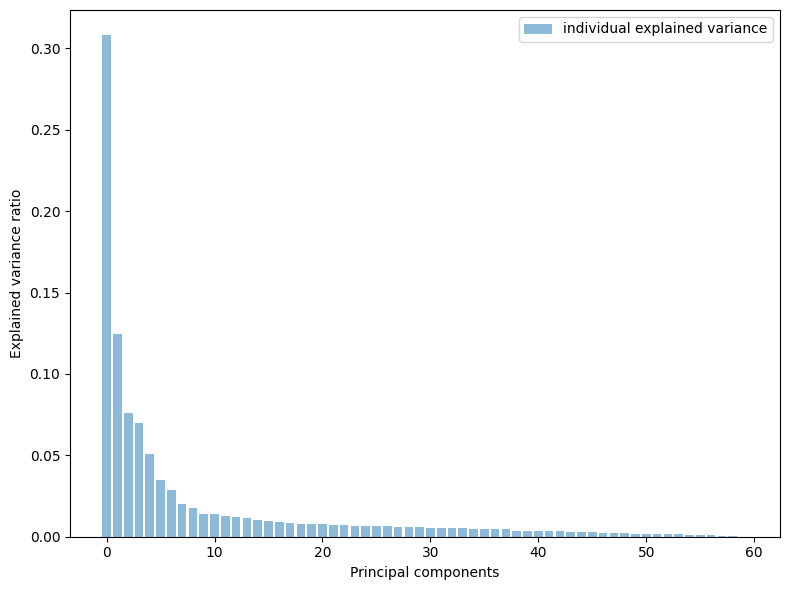

In [107]:
plt.figure(figsize=(8, 6))
plt.bar(range(60), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

Many components explain fairly equal, small amounts of variance meaning that there may be multiple components needed for the model (even if their number is smaller than the number of variables going into the model). Let's find the optimal number of components needed such that the logistic regression conducted on the PCA variables had a higher accuracy than the original logistic regression model.

In [108]:
max = 0
for i in range (1,len(X.columns)-1):
    pca=PCA(n_components=i)
    X_pca=pca.fit_transform(X)
    x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, Y, test_size = 0.3)
    modelpca = LogisticRegression()
    modelpca.fit(x_train_pca, y_train_pca)
    if model.score(x_test, y_test) < modelpca.score(x_test_pca, y_test_pca):
        max = i


In [109]:
print(max)

58


In [110]:
pca=PCA(n_components=max)
X_pca=pca.fit_transform(X)

In [111]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(X_new, Y, test_size = 0.3)

In [112]:
modelpca = LogisticRegression()
modelpca.fit(x_train_pca, y_train_pca)

LogisticRegression()

In [113]:
y_pred_pca = modelpca.predict(x_test_pca)

In [114]:
print(classification_report(y_test_pca, y_pred_pca))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       641
           1       0.75      0.67      0.71       387

    accuracy                           0.79      1028
   macro avg       0.78      0.77      0.78      1028
weighted avg       0.79      0.79      0.79      1028



In [115]:
print("Accuracy: ", round(modelpca.score(x_test_pca, y_test_pca),2))

Accuracy:  0.79


In [116]:
logit_modelpca=sm.Logit(Y,X_pca)
resultpca=logit_modelpca.fit()
print(resultpca.summary2())

Optimization terminated successfully.
         Current function value: 0.413168
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.376    
Dependent Variable: Persistency_Flag AIC:              2945.3748
Date:               2023-06-11 20:20 BIC:              3301.4116
No. Observations:   3424             Log-Likelihood:   -1414.7  
Df Model:           57               LL-Null:          -2267.7  
Df Residuals:       3366             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
------------------------------------------------------------------
x1        0.7351     0.0263   27.9334   0.0000    0.6836    0.7867
x2        0.1835     0.0295    6.2171   0.0000    0.1256    0.2413
x3 

In [117]:
fpr2, tpr2, thresholds2 = roc_curve(y_test_pca, y_pred_pca, pos_label=1)

In [118]:
roc_auc2 = roc_auc_score(y_test_pca, y_pred_pca)
roc_auc2

0.7696146605554145

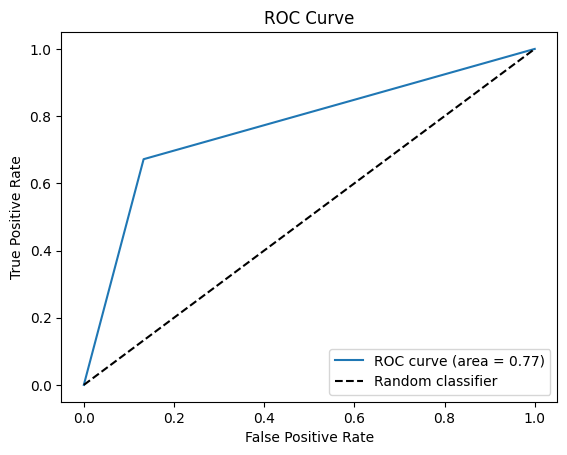

In [119]:
plt.plot(fpr2, tpr2, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

The logistic regression model using PCA data (with 57 best identified features) seems be as good as the initial logistic regression model. Let's see if reducing variables in any other way may lead to a higher accuracy of the model. 

In [120]:
#first, let's try recursive feature elimination 

In [121]:
from sklearn.feature_selection import RFECV

In [122]:
model1 = LogisticRegression()

In [123]:
rfecv = RFECV(estimator= model1, scoring="accuracy")
rfecv = rfecv.fit(x_train, y_train)

In [124]:
print("The optimal number of features:", rfecv.n_features_)
print("Best features:", X.columns[rfecv.support_])

The optimal number of features: 30
Best features: Index(['Region', 'Age_Bucket', 'Ntm_Specialist_Flag', 'Ntm_Speciality_Bucket',
       'Gluco_Record_Prior_Ntm', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_Risk_Segment', 'Adherent_Flag',
       'Idn_Indicator',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Long_Term_Current_Drug_Therapy',
       'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
       'Comorb_Gastro_esophageal_reflux_disease',
       'Concom_Systemic_Corticosteroids_Plain',
       'Concom_Macrolides_And_Similar_Types',
       'Concom_Broad_Spectrum_Penicillins', 'Concom_Viral_Vaccines',
       'Risk_Type_1_Insulin_Dependent_Diabetes', 'Risk_Rheumatoid_Arthritis',
       'Risk_

The recursive feature elimination process led to the elimination of an additional 10 features, which may be optimal when running the model. Let's also try recursive elimination after using SMOTE oversampling, which replaces imbalanced data using the k-nearest neighbour procedure. 

In [125]:
from imblearn.combine import SMOTEENN
smtn = SMOTEENN(random_state = 0)

In [126]:
smtn.fit(X,Y)
# Making samples
X, Y = smtn.fit_resample(X,Y)
Y.value_counts()

1    1363
0    1063
Name: Persistency_Flag, dtype: int64

In [127]:
for col in X:
        print(col, end="\n")
        print(X[col].value_counts(), end='\n\n')

Gender
0    2326
1     100
Name: Gender, dtype: int64

Race
2    2232
1      79
3      59
0      56
Name: Race, dtype: int64

Ethnicity
1    2307
0      68
2      51
Name: Ethnicity, dtype: int64

Region
0    1001
3     903
4     338
1     150
2      34
Name: Region, dtype: int64

Age_Bucket
3    970
1    752
0    554
2    150
Name: Age_Bucket, dtype: int64

Ntm_Specialist_Flag
0    1411
1    1015
Name: Ntm_Specialist_Flag, dtype: int64

Ntm_Speciality_Bucket
1    1379
0     662
2     385
Name: Ntm_Speciality_Bucket, dtype: int64

Gluco_Record_Prior_Ntm
0    1961
1     465
Name: Gluco_Record_Prior_Ntm, dtype: int64

Gluco_Record_During_Rx
0    1778
1     648
Name: Gluco_Record_During_Rx, dtype: int64

Dexa_Freq_During_Rx
0    1403
6     723
5     190
4      60
3      27
2      12
1      11
Name: Dexa_Freq_During_Rx, dtype: int64

Dexa_During_Rx
0    1403
1    1023
Name: Dexa_During_Rx, dtype: int64

Frag_Frac_Prior_Ntm
0    2117
1     309
Name: Frag_Frac_Prior_Ntm, dtype: int64

Frag_F

SMOTE oversampling did not seem to create a more balanced dataset but let's see how many features the recursive feature elimination algorithm identifies based on the new dataset.

In [128]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.30)

In [129]:
x_train2 = scaler.fit_transform(x_train2)
x_test2 = scaler.transform(x_test2)

In [130]:
rfecv2 = RFECV(estimator= model1, scoring="accuracy")
rfecv2 = rfecv2.fit(x_train2, y_train2)

In [131]:
print("The optimal number of features:", rfecv2.n_features_)
print("Best features:", X.columns[rfecv2.support_])

The optimal number of features: 52
Best features: Index(['Gender', 'Ethnicity', 'Region', 'Age_Bucket', 'Ntm_Speciality_Bucket',
       'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx',
       'Dexa_Freq_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm',
       'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Tscore_Bucket_During_Rx', 'Change_T_Score',
       'Change_Risk_Segment', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
       'Comorb_Disorders_of_lipoprotein_metabolis

The optimal numer of identified features is 56, more than with the previous dataset, so oversampling in this case does not seem to be the more efficient choice. Finally, let's run a logistic regression model on the data containing only 50 features as previously suggested. 

In [132]:
X2 = df_ordinal[['Gender', 'Region', 'Age_Bucket', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
       'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
       'Comorb_Osteoporosis_without_current_pathological_fracture',
       'Comorb_Personal_history_of_malignant_neoplasm',
       'Comorb_Gastro_esophageal_reflux_disease',
       'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations',
       'Concom_Narcotics', 'Concom_Systemic_Corticosteroids_Plain',
       'Concom_Fluoroquinolones', 'Concom_Cephalosporins',
       'Concom_Macrolides_And_Similar_Types',
       'Concom_Broad_Spectrum_Penicillins', 'Concom_Anaesthetics_General',
       'Concom_Viral_Vaccines', 'Risk_Type_1_Insulin_Dependent_Diabetes',
       'Risk_Rheumatoid_Arthritis', 'Risk_Untreated_Chronic_Hypogonadism',
       'Risk_Patient_Parent_Fractured_Their_Hip', 'Risk_Smoking_Tobacco',
       'Risk_Chronic_Malnutrition_Or_Malabsorption',
       'Risk_Poor_Health_Frailty', 'Risk_Recurring_Falls', 'Count_Of_Risks']]
Y2 = df_ordinal['Persistency_Flag']

In [133]:
x_train_final, x_test_final, y_train_final, y_test_final = train_test_split(X2, Y2, 
                                                                  test_size=0.30)

In [134]:
x_train_final = scaler.fit_transform(x_train_final)
x_test_final = scaler.transform(x_test_final)

In [135]:
model_final = LogisticRegression()
model_final.fit(x_train_final, y_train_final)

LogisticRegression()

In [136]:
y_pred_final = model_final.predict(x_test_final)

In [137]:
print(classification_report(y_test_final, y_pred_final))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       646
           1       0.76      0.68      0.72       382

    accuracy                           0.80      1028
   macro avg       0.79      0.78      0.78      1028
weighted avg       0.80      0.80      0.80      1028



In [138]:
print("Accuracy: ", round(model_final.score(x_test_final, y_test_final),2))

Accuracy:  0.8


In [139]:
fpr3, tpr3, thresholds3 = roc_curve(y_test_final, y_pred_final, pos_label=1)

In [140]:
roc_auc3 = roc_auc_score(y_test_final, y_pred_final)
roc_auc3

0.776072650057543

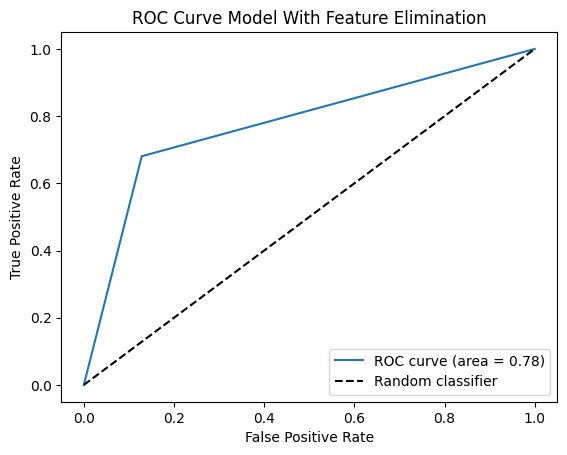

In [141]:
plt.plot(fpr3, tpr3, label='ROC curve (area = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Model With Feature Elimination')
plt.legend(loc="lower right")
plt.show()

The model with only 50 features slightly outperforms all other models (in terms of precision and recall scores). A last possibility would be to try eliminating correlated variables one by one to see how much more this would improve accuracy scores, but it is unlikely that there would be any dramatic difference. Therefore, our logistic regression model with 50 features performs reasonably well with 82% accuracy. 